In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 156s 1us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [10]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [20]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

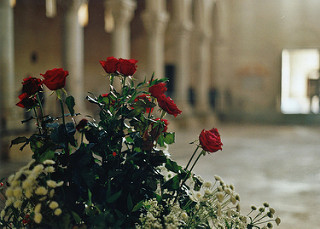

In [22]:
PIL.Image.open(str(roses[640]))

In [23]:
tulips = list(data_dir.glob('tulips/*'))
len(tulips)

799

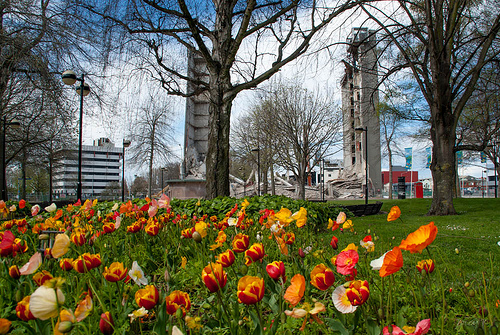

In [26]:
PIL.Image.open(str(tulips[798]))

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [29]:
flowers_images_dict['dandelion']

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

In [46]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [34]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [35]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [36]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [37]:
img.shape

(240, 179, 3)

In [39]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [70]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [124]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [125]:
x = np.array(x)
y = np.array(y)

In [123]:
x_train[:5]

array([[[[ 68,  79,  77],
         [ 63,  70,  63],
         [ 60,  62,  56],
         ...,
         [ 49,  40,  37],
         [ 48,  39,  36],
         [ 48,  39,  36]],

        [[ 57,  62,  60],
         [ 61,  64,  60],
         [ 60,  61,  55],
         ...,
         [ 48,  39,  36],
         [ 48,  39,  36],
         [ 50,  41,  38]],

        [[ 61,  58,  57],
         [ 64,  64,  59],
         [ 59,  59,  53],
         ...,
         [ 49,  40,  37],
         [ 49,  40,  37],
         [ 50,  41,  38]],

        ...,

        [[ 49, 121,  93],
         [ 40,  65,  51],
         [ 52,  96,  67],
         ...,
         [156, 216, 211],
         [161, 216, 212],
         [169, 203, 206]],

        [[ 48, 119,  90],
         [ 45,  58,  44],
         [ 50,  91,  60],
         ...,
         [217, 233, 238],
         [201, 212, 215],
         [185, 168, 175]],

        [[ 54, 121,  95],
         [ 46,  58,  46],
         [ 46,  89,  60],
         ...,
         [227, 245, 248],
        

In [96]:
y[:5]

array([0, 0, 0, 0, 0])

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [98]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2752
2752
918
918


In [99]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [105]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(x_train_scaled, y_train , epochs=10)

Epoch 1/10
86/86 [==============================] - 25s 274ms/step - loss: 1.3482 - accuracy: 0.4371
Epoch 2/10
86/86 [==============================] - 25s 290ms/step - loss: 1.0063 - accuracy: 0.6134
Epoch 3/10
86/86 [==============================] - 29s 332ms/step - loss: 0.8022 - accuracy: 0.6940
Epoch 4/10
86/86 [==============================] - 29s 341ms/step - loss: 0.5697 - accuracy: 0.7976
Epoch 5/10
86/86 [==============================] - 30s 347ms/step - loss: 0.3982 - accuracy: 0.8648
Epoch 6/10
86/86 [==============================] - 28s 330ms/step - loss: 0.2090 - accuracy: 0.9360
Epoch 7/10
86/86 [==============================] - 27s 312ms/step - loss: 0.1088 - accuracy: 0.9702
Epoch 8/10
86/86 [==============================] - 28s 327ms/step - loss: 0.0673 - accuracy: 0.9807
Epoch 9/10
86/86 [==============================] - 27s 320ms/step - loss: 0.0507 - accuracy: 0.9895
Epoch 10/10
86/86 [==============================] - 27s 312ms/step - loss: 0.0642 - accura

In [108]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 2s 73ms/step - loss: 1.9263 - accuracy: 0.6250


[1.9263337850570679, 0.625]

In [109]:
# just 62% accuracy in test data but 98.11% accuracy in train data. Definitely a case of overfitting

In [111]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 2s 77ms/step


array([[  2.4138906 ,  17.733202  ,   0.19166672, -16.658587  ,
         -4.233154  ],
       [ 13.605541  ,  -2.9700189 ,  -9.126455  ,  -9.675017  ,
          4.973293  ],
       [ -1.79091   ,  -2.315489  ,   6.781982  ,  -8.091666  ,
         -1.2166386 ],
       ...,
       [  0.5829752 ,  -2.187756  ,  -7.116191  ,   1.4062587 ,
          6.128245  ],
       [  0.12268765,  -1.7706982 ,   6.1971025 ,  -5.0956745 ,
         -0.72276783],
       [  1.0642092 , -11.121402  ,   3.7348917 ,   5.428797  ,
          3.7118325 ]], dtype=float32)

In [115]:
score = tf.nn.softmax(predictions[5])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.4438001e-05, 6.7317842e-08, 3.6581311e-01, 6.3410270e-01,
       6.9662274e-05], dtype=float32)>

In [116]:
np.argmax(score)

3

In [117]:
y_test[5]

3

In [118]:
# In this particular case, it is right. But still, 62% accuracy is pretty low

In [162]:
data_augmentation = keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape=(img_height,
                                                            img_width,
                                                            3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    
])

NameError: name 'img_height' is not defined

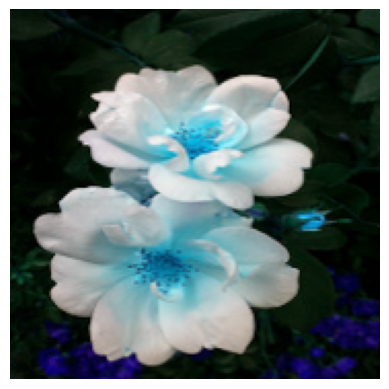

In [163]:
plt.axis('off')
plt.imshow(x[0])

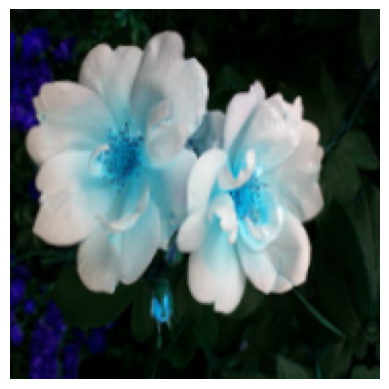

In [164]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [166]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(x_train_scaled, y_train , epochs=10)

Epoch 1/10
86/86 [==============================] - 60s 610ms/step - loss: 1.3369 - accuracy: 0.4284
Epoch 2/10
86/86 [==============================] - 54s 632ms/step - loss: 1.0519 - accuracy: 0.5814
Epoch 3/10
86/86 [==============================] - 53s 619ms/step - loss: 0.9634 - accuracy: 0.6152
Epoch 4/10
86/86 [==============================] - 52s 601ms/step - loss: 0.8867 - accuracy: 0.6573
Epoch 5/10
86/86 [==============================] - 51s 594ms/step - loss: 0.8509 - accuracy: 0.6668
Epoch 6/10
86/86 [==============================] - 51s 591ms/step - loss: 0.8016 - accuracy: 0.6940
Epoch 7/10
86/86 [==============================] - 52s 599ms/step - loss: 0.7950 - accuracy: 0.6890
Epoch 8/10
86/86 [==============================] - 52s 601ms/step - loss: 0.7421 - accuracy: 0.7155
Epoch 9/10
86/86 [==============================] - 1830s 22s/step - loss: 0.7108 - accuracy: 0.7227
Epoch 10/10
86/86 [==============================] - 55s 635ms/step - loss: 0.6923 - accura

In [168]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 5s 161ms/step - loss: 2.4756 - accuracy: 0.2603


[2.4755938053131104, 0.2603485882282257]